In [23]:
import requests
import zipfile
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations



# Set options to visualize all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL of the zip file you want to download
benefits_url = "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_20.zip"
benefits_root = 'benefits'
benefits_filename = 'benefits'

claims_url = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.zip'
claims_root = 'claims'
claims_filename = 'claims'

#### Data Download

In [2]:
def download_data(data_url, data_root, data_filename):
  # Send an HTTP GET request to the URL
  response = requests.get(data_url)

  if response.status_code == 200:
      # Create a ZipFile object from the response content
      with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
          # Specify the directory where you want to extract the contents
          extraction_path = f"/content/extracted_data/{data_root}"
          zip_ref.extractall(extraction_path)

          # List all files in the extraction directory
          extracted_files = os.listdir(extraction_path)

          # Check if there's only one file in the extraction directory
          if len(extracted_files) == 1:
              # Assuming it's the extracted CSV file, rename it as per user input
              extracted_csv_file = extracted_files[0]
              os.rename(os.path.join(extraction_path, extracted_csv_file), os.path.join(extraction_path, f"{data_filename}.csv"))
              print(f"Data has been downloaded, extracted, and saved as {data_filename}.csv")

              return os.path.join(extraction_path, f"{data_filename}.csv")
          else:
              print("Error: There should be exactly one file in the extraction directory.")
  else:
      print("Failed to download the data.")


benefits_path = download_data(benefits_url, benefits_root, benefits_filename)
claims_path = download_data(claims_url, claims_root, claims_filename)

Data has been downloaded, extracted, and saved as benefits.csv
Data has been downloaded, extracted, and saved as claims.csv


In [135]:
benefits_pdf = pd.read_csv(benefits_path)
benefits_pdf.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,0,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,0,12,1,1,2,1,2,2,2,2,2,2,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,0,12,1,1,2,1,2,1,1,1,1,1,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [136]:
claims_pdf = pd.read_csv(claims_path)
claims_pdf.head()

<ipython-input-136-027184d21553>:1: DtypeWarning: Columns (21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  claims_pdf = pd.read_csv(claims_path)


,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00001C24EE7B06AC,684562269783396,1,20090404.0,20090404.0,1100SK,200.0,0.0,1.298827e+09,NaN,NaN,0.0,74560,V5861,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.0,NaN,93303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001C24EE7B06AC,684012269893042,1,20100310.0,20100310.0,1100SK,500.0,0.0,1.298827e+09,NaN,NaN,0.0,7879,V4589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,74000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000072CF62193213,684012269540703,1,20080130.0,20080130.0,1000AH,50.0,0.0,8.929521e+09,NaN,8.523329e+09,0.0,4019,73300,79431,V5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,80053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000072CF62193213,684472269696971,1,20080301.0,20080301.0,1000AH,70.0,0.0,8.382688e+09,NaN,NaN,0.0,4019,71699,V7644,78605,7226,V1582,43882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,NaN,36415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000072CF62193213,684122269778934,1,20080322.0,20080322.0,3400HK,40.0,0.0,4.404237e+09,NaN,NaN,0.0,1736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,1733,88305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 2: Basic Data Cleaning

In [137]:
# Define all columns related to chronic illness
chronic_illness_cols = [ 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
                        'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT',
                        'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']

# Define a function to combine chronic conditions
def create_combined_column(x):
    values = [col for col in chronic_illness_cols if x[col] == 1]
    sorted_values = sorted(values)  # Sort the values
    return ', '.join(sorted_values)

def count_conditions(x):
  return len(x.split(','))


# Convert values to Booleans (1 to True, 2 to False) for chronic illness columns
benefits_pdf['Chronic_Conditions'] = benefits_pdf.apply(create_combined_column, axis=1)

# Count the number of chronic conditions for each member
benefits_pdf['Condition_Count'] = benefits_pdf['Chronic_Conditions'].apply(count_conditions)

# Categorize members with 3 or more conditions as 'Multiple'
benefits_pdf['Chronic_Conditions_Type'] = benefits_pdf.apply(lambda row: 'Multiple' if row['Condition_Count'] >= 3 else 'LessThan3', axis=1)

In [138]:
master_pdf = benefits_pdf.merge(claims_pdf, how='left', on='DESYNPUF_ID')

#### Step 3: Basic Summaries

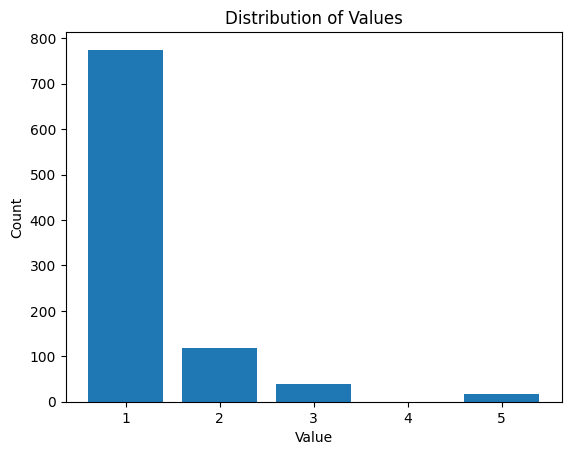

In [125]:
# 1 - What is the distribution of races?

# Count the occurrences of each value in the 'BENE_RACE_CD' column
value_counts = master_pdf['BENE_RACE_CD'].value_counts().sort_index()

# Create a bar chart
plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values')

# Show the plot
plt.show()

In [127]:
# 2 - What is the most common chronic illness combination?
all_chronic_conditions = master_pdf['Chronic_Conditions'].unique()

# Split each list element into constituent conditions and flatten the list
individual_conditions = [condition.strip() for combo in all_chronic_conditions for condition in combo.split(',')]

# Generate pairs of conditions
pairs = list(combinations(individual_conditions, 2))

# Normalize pairs to ensure consistent order (A-B and B-A are treated the same)
normalized_pairs = [tuple(sorted(pair)) for pair in pairs]

# Use Counter to count the occurrences of each pair
pair_counts = Counter(normalized_pairs)

# Filter out pairs where both elements are not blank and not the same
filtered_pairs = [(a, b, count) for (a, b), count in pair_counts.items() if a and b and a != b]

# Sort by count in descending order
filtered_pairs.sort(key=lambda x: x[2], reverse=True)

# Find the most common chronic condition pair
most_common_pair = Counter(filtered_pairs).most_common(1)

# Take the top 10 most common pairs
top_10_pairs = filtered_pairs[:10]

# Print the most common chronic condition pair and its count
print("Most Common Chronic Condition Pair:", '-'.join(most_common_pair[0][0][0:-1]))
print("Count:", most_common_pair[0][0][-1])
print('\n'*2)

print('Top 10 Most Common Chronic Condition Pairs: ')
# Print the top 10 most common chronic condition pairs and their counts
for idx, (condition1, condition2, count) in enumerate(top_10_pairs, start=1):
    print(f"{idx}. Pair: ({condition1}, {condition2}), Count: {count}")

Most Common Chronic Condition Pair: SP_DIABETES-SP_ISCHMCHT
Count: 15125



Top 10 Most Common Chronic Condition Pairs: 
1. Pair: (SP_DIABETES, SP_ISCHMCHT), Count: 15125
2. Pair: (SP_CHF, SP_ISCHMCHT), Count: 12500
3. Pair: (SP_CHF, SP_DIABETES), Count: 12100
4. Pair: (SP_DEPRESSN, SP_ISCHMCHT), Count: 10500
5. Pair: (SP_DEPRESSN, SP_DIABETES), Count: 10164
6. Pair: (SP_CHRNKIDN, SP_ISCHMCHT), Count: 9250
7. Pair: (SP_CHRNKIDN, SP_DIABETES), Count: 8954
8. Pair: (SP_ALZHDMTA, SP_ISCHMCHT), Count: 8750
9. Pair: (SP_ALZHDMTA, SP_DIABETES), Count: 8470
10. Pair: (SP_CHF, SP_DEPRESSN), Count: 8400


In [158]:
# Most Common Chronic Condition Combination

Counter(master_pdf[master_pdf['Chronic_Conditions'] != '']['Chronic_Conditions']).most_common(10)

[('SP_ISCHMCHT', 19995),
 ('SP_DIABETES, SP_ISCHMCHT', 14391),
 ('SP_CHF, SP_DIABETES, SP_ISCHMCHT', 12037),
 ('SP_DIABETES', 11386),
 ('SP_CHF, SP_ISCHMCHT', 9457),
 ('SP_CHF, SP_CHRNKIDN, SP_DIABETES, SP_ISCHMCHT', 9051),
 ('SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_COPD, SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT',
  8124),
 ('SP_DEPRESSN', 7097),
 ('SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT', 6983),
 ('SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT',
  6972)]

Hence, the most common chronic illness combination is SP_DIABETES - SP_ISCHMCHT

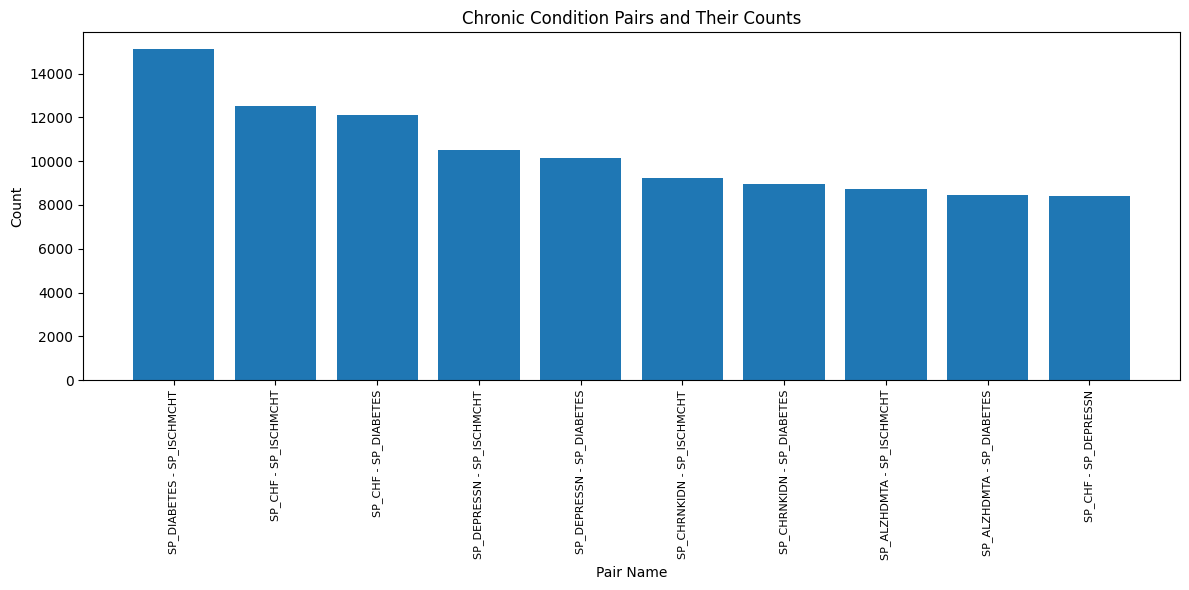

In [73]:
# Extract pair names and counts
pair_names = [f"{condition1} - {condition2}" for condition1, condition2, _ in top_10_pairs]
pair_counts = [count for _, _, count in top_10_pairs]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(pair_names, pair_counts)
plt.xlabel('Pair Name')
plt.ylabel('Count')
plt.title('Chronic Condition Pairs and Their Counts')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

In [173]:
# 3 - Which chronic illness combination has the total highest cost?

# Group by combinations and sum payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby('Chronic_Conditions')['CLM_PMT_AMT'].sum()

# Find the combination with the highest total payment amount
highest_payment_combination = combination_totals.idxmax()

# Get the highest total payment amount
highest_payment_amount = combination_totals.max()

# Print the combination and its total payment amount
print("Combination with Highest Total Payment Amount:", highest_payment_combination)
print("Total Payment Amount for the Combination:", highest_payment_amount)

Combination with Highest Total Payment Amount: SP_CHF, SP_CHRNKIDN, SP_DIABETES, SP_ISCHMCHT
Total Payment Amount for the Combination: 4404280.0


In [176]:
# 4 - Which chronic illness combination has the highest cost per member?

# Group by combinations and sum payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby('Chronic_Conditions')['CLM_PMT_AMT'].mean()

# Find the combination with the highest total payment amount
highest_payment_combination = combination_totals.idxmax()

# Get the highest total payment amount
highest_payment_amount = combination_totals.max()

# Print the combination and its total payment amount
print("Combination with Highest Total Payment Amount:", highest_payment_combination)
print("Total Payment Amount for the Combination:", highest_payment_amount)

Combination with Highest Total Payment Amount: SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_CNCR, SP_COPD, SP_DEPRESSN, SP_ISCHMCHT, SP_STRKETIA
Total Payment Amount for the Combination: 3000.0


#### 4.	Benchmarking